<a href="https://colab.research.google.com/github/debanandasen/Tensorflow/blob/main/03_CNN_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN and Computer vision with Tensorflow

The images we'are working with me from the Food01 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

In [1]:
## Get Data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-03-21 04:45:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.250.31.128, 142.251.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  54.1MB/s    in 1.9s    

2023-03-21 04:45:48 (54.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspect the data (become one with it)

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [5]:
## Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names from sub-directories
print(class_names)

['pizza' 'steak']


In [6]:
# Let's viualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_imgae(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img



['2865730.jpg']
Image shape: (512, 384, 3)


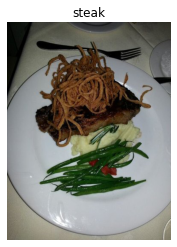

In [52]:
# View random images from training dataset
img = view_random_imgae(target_dir = "pizza_steak/train/",
                        target_class="steak")

In [8]:
# View the image shape
img.shape # returns width, height , colour channels


(512, 512, 3)

In [9]:
img/255

array([[[0.27843137, 0.2745098 , 0.26666667],
        [0.29803922, 0.28235294, 0.27058824],
        [0.30196078, 0.29019608, 0.27058824],
        ...,
        [0.60392157, 0.60784314, 0.68627451],
        [0.68627451, 0.6745098 , 0.75686275],
        [0.74509804, 0.7254902 , 0.80392157]],

       [[0.2745098 , 0.27058824, 0.2627451 ],
        [0.29411765, 0.27843137, 0.26666667],
        [0.29803922, 0.28627451, 0.26666667],
        ...,
        [0.57647059, 0.58431373, 0.66666667],
        [0.71372549, 0.70588235, 0.79215686],
        [0.79607843, 0.78431373, 0.86666667]],

       [[0.2745098 , 0.27058824, 0.2627451 ],
        [0.29019608, 0.2745098 , 0.2627451 ],
        [0.29019608, 0.27843137, 0.25882353],
        ...,
        [0.38431373, 0.39215686, 0.49019608],
        [0.49803922, 0.49803922, 0.6       ],
        [0.61960784, 0.60784314, 0.71372549]],

       ...,

       [[0.89803922, 0.95294118, 0.81176471],
        [0.89803922, 0.95294118, 0.81176471],
        [0.90196078, 0

## An end-to-end example of convolutional neural network


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values 0 & 1)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# import  data from directory and turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN Model(same as Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D( filters=10,
                                    kernel_size=3,
                                    activation="relu",
                                    input_shape=(224,224,3)),
            tf.keras.layers.Conv2D(10,3, activation="relu"),
            tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
            tf.keras.layers.Conv2D(10,3, activation="relu"),
            tf.keras.layers.Conv2D(10,3, activation="relu"),
            tf.keras.layers.MaxPool2D(2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the Model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 245ms/step - loss: 0.5823 - accuracy: 0.6967 - val_loss: 0.3955 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4667 - accuracy: 0.7953 - val_loss: 0.3848 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4536 - accuracy: 0.8007 - val_loss: 0.4084 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 12s 246ms/step - loss: 0.4158 - accuracy: 0.8167 - val_loss: 0.3956 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3809 - accuracy: 0.8387 - val_loss: 0.3359 - val_accuracy: 0.8620


## Pre-process the data ( preapre it for a model)

In [11]:
# Define direcory datasets path
train_dir ="pizza_steak/train/"
test_dir ="pizza_steak/test/"

## Turn data into **batches**

In [12]:
!nvidia-smi

Tue Mar 21 04:47:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    29W /  70W |   2365MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
# Create train and test data generators , rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen   = ImageDataGenerator(rescale=1/255.)

# Load in our image data from directories and turn them into batches

In [14]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode ="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
test_data

In [16]:
# Get sample of image datasets
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [17]:
# How many batces
len(train_data)

47

## Create CNN Model(start with a baseline)

In [18]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [19]:
from keras.layers.serialization import activation
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), # Input layer
           Conv2D(10,3, activation="relu"),
           Conv2D(10,3, activation="relu"),
           Flatten(),
           Dense(1, activation="sigmoid") # Output Layer
])

In [20]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [21]:
# Get Summary of the Model
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## Fit the Model

In [22]:
len(train_data),len(test_data)

(47, 16)

In [23]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 240ms/step - loss: 0.7240 - accuracy: 0.5920 - val_loss: 0.5220 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.5012 - accuracy: 0.7633 - val_loss: 0.4043 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3465 - accuracy: 0.8580 - val_loss: 0.4004 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 11s 230ms/step - loss: 0.1658 - accuracy: 0.9407 - val_loss: 0.3756 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 11s 235ms/step - loss: 0.0556 - accuracy: 0.9867 - val_loss: 0.5254 - val_accuracy: 0.7840


## Evaluate the Model

<Axes: >

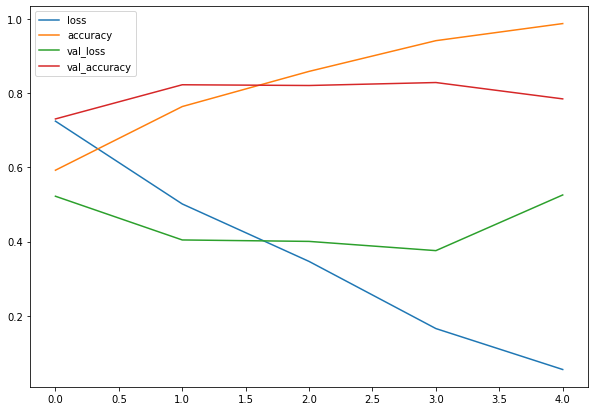

In [24]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))


In [25]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

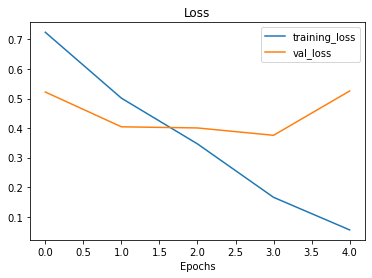

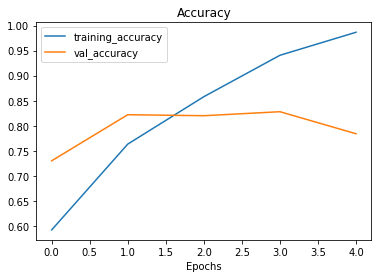

In [26]:
from tensorflow.python.ops import histogram_ops
plot_loss_curves(history_4)

## Adjust Model Parameter
1. Create a baseline
2. Beat the baseline by overfiting the Model
3. Reduce Overfitting

In [27]:
model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), # Input layer
           MaxPool2D(pool_size=2),
           Conv2D(10,3, activation="relu"),
           MaxPool2D(),
           Conv2D(10,3, activation="relu"),
           MaxPool2D(),
           Flatten(),
           Dense(1, activation="sigmoid") # Output Layer
])

In [28]:
# Compile the Model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [29]:
# Fit the Model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 219ms/step - loss: 0.6381 - accuracy: 0.6227 - val_loss: 0.4815 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4551 - accuracy: 0.7953 - val_loss: 0.4255 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4111 - accuracy: 0.8180 - val_loss: 0.3431 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 12s 264ms/step - loss: 0.3834 - accuracy: 0.8287 - val_loss: 0.3815 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3753 - accuracy: 0.8420 - val_loss: 0.3173 - val_accuracy: 0.8540


In [30]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

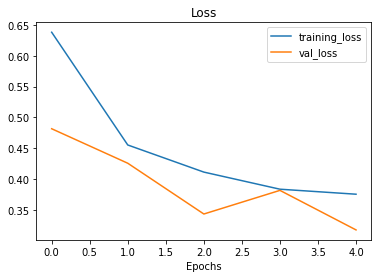

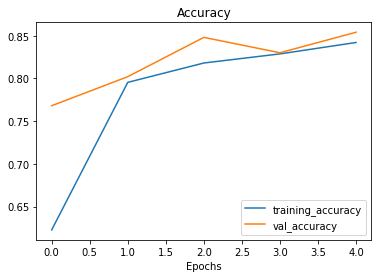

In [31]:
# Plot the loss curve
plot_loss_curves(history_5)

## Data Augmentation

In [32]:
# Preprocess data (get all of the pixel values 0 & 1)

train_datagen_augmented = ImageDataGenerator( rescale=1./255,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.3,
                                              horizontal_flip=True)
train_datagen = ImageDataGenerator( rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode ="binary",
                                                                   batch_size=32)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode ="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [35]:
# Create a Model with Augmented data
model_6 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), # Input layer
           MaxPool2D(pool_size=2),
           Conv2D(10,3, activation="relu"),
           MaxPool2D(),
           Conv2D(10,3, activation="relu"),
           MaxPool2D(),
           Flatten(),
           Dense(1, activation="sigmoid") # Output Layer
])


In [36]:
from keras.optimizers.optimizer_experimental import optimizer
# Compile the Model
model_6.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

In [38]:
# Fit the Model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 583ms/step - loss: 0.6401 - accuracy: 0.6413 - val_loss: 0.4828 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 26s 559ms/step - loss: 0.5497 - accuracy: 0.7400 - val_loss: 0.4247 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 25s 542ms/step - loss: 0.5387 - accuracy: 0.7360 - val_loss: 0.4196 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 25s 542ms/step - loss: 0.5257 - accuracy: 0.7427 - val_loss: 0.3835 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 25s 535ms/step - loss: 0.5091 - accuracy: 0.7573 - val_loss: 0.5054 - val_accuracy: 0.7400


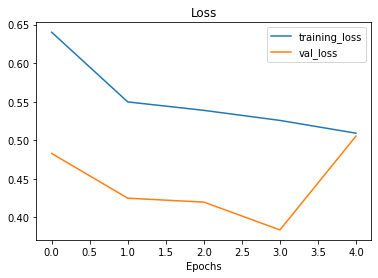

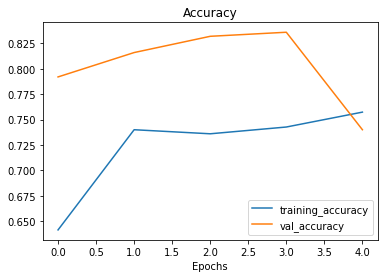

In [39]:
# Check Model training curve
plot_loss_curves(history_6)

In [43]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode ="binary",
                                                                   batch_size=32,
                                                                   shuffle=True)


Found 1500 images belonging to 2 classes.


In [48]:
# Create a Model with Augmented data
model_7 = Sequential([
                      Conv2D( filters=10,
                              kernel_size=3,
                              strides=1,
                              padding="valid",
                              activation="relu",
                              input_shape=(224,224,3)), # Input layer
                              MaxPool2D(pool_size=2),
                              Conv2D(10,3, activation="relu"),
                              MaxPool2D(),
                              Conv2D(10,3, activation="relu"),
                              MaxPool2D(),
                              Flatten(),
                              Dense(1, activation="sigmoid") # Output Layer
])


In [49]:
from keras.optimizers.optimizer_experimental import optimizer
# Compile the Model
model_7.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

## Model with Augmented and Shuffled Data

In [50]:
# Fit the Model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 27s 540ms/step - loss: 0.6674 - accuracy: 0.5947 - val_loss: 0.6011 - val_accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 26s 545ms/step - loss: 0.5733 - accuracy: 0.6933 - val_loss: 0.4616 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 26s 546ms/step - loss: 0.5229 - accuracy: 0.7507 - val_loss: 0.3547 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 26s 547ms/step - loss: 0.4843 - accuracy: 0.7640 - val_loss: 0.3201 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 26s 546ms/step - loss: 0.4500 - accuracy: 0.8087 - val_loss: 0.3085 - val_accuracy: 0.8800


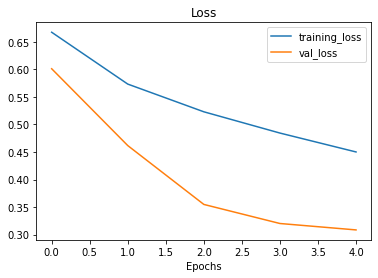

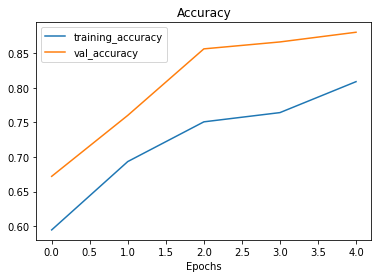

In [51]:
# Check Model training curve
plot_loss_curves(history_7)